In [1]:
# Latihan 1
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# import library for build model 
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

# import library untuk data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
dataset ="Stock.csv"
data = pd.read_csv(dataset)

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,56.45,56.66,55.46,56.53,3716500,UTX
1,2006-01-04,56.80,56.80,55.84,56.19,3114500,UTX
2,2006-01-05,56.30,56.49,55.63,55.98,3118900,UTX
3,2006-01-06,56.45,56.67,56.10,56.16,2874300,UTX
4,2006-01-09,56.37,56.90,56.16,56.80,2467200,UTX


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3020 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [5]:
# Kolom 'low' yang akan kita gunakan dalam membangun model
# Slice kolom 'low' 

Low_data = data.iloc[:,3:4].values

In [6]:
# cek output low_data
Low_data

array([[ 55.46],
       [ 55.84],
       [ 55.63],
       ...,
       [126.92],
       [127.29],
       [127.57]])

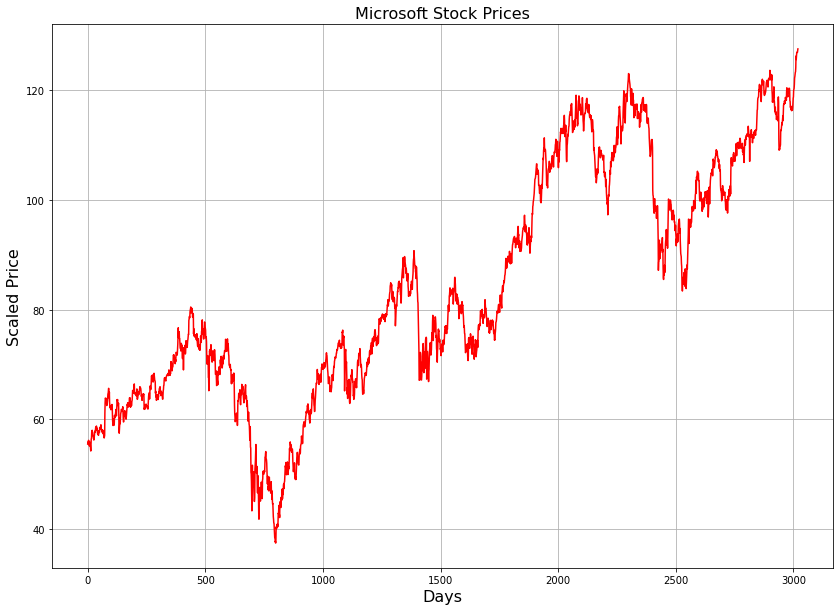

In [7]:
# Visualizing low_data

plt.figure(figsize=(14,10))                 
plt.plot(Low_data,c="red")
plt.title("Microsoft Stock Prices",fontsize=16)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Scaled Price",fontsize=16)
plt.grid()
plt.show()

In [8]:
# Latihan 2
# Menskalakan data antara 1 dan 0 (scaling) pada low data

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(Low_data)

In [9]:
# definisikan variabel step dan train 

step_size = 21                      

train_x = []
train_y = []

In [12]:
# membuat fitur dan lists label

for i in range(step_size, 3019):               
    train_x.append(training_set_scaled[i-step_size:i,0])
    train_y.append(training_set_scaled[i,0])

In [13]:
# mengonversi list yang telah dibuat sebelumnya ke array

train_x = np.array(train_x)                   
train_y = np.array(train_y)

In [14]:
# cek dimensi data dengan function .shape

print(train_x.shape)

(2998, 21)


In [15]:
# 498 hari terakhir akan digunakan dalam pengujian
# 2500 hari pertama akan digunakan dalam pelatihan

test_x = train_x[2500:]           
train_x = train_x[:2500]        
test_y = train_y[2500:] 
train_y = train_y[:2500]

In [16]:
# reshape data untuk dimasukkan kedalam Keras model

train_x = np.reshape(train_x, (2500, step_size, 1))          
test_x = np.reshape(test_x, (498, step_size, 1))

In [17]:
# cek kembali dimensi data yang telah di reshape dengan function .shape

print(train_x.shape)
print(test_x.shape)  

(2500, 21, 1)
(498, 21, 1)


In [18]:
# Latihan 3
# buat varibel penampung model RNN
rnn_model = Sequential()

In [19]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.15

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True, input_shape=(train_x.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=False))
rnn_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
rnn_model.add(Dense(1))

In [20]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam",loss="MSE")

In [21]:
# fit the model RNN, dengan epoch 20 dan batch size 25

rnn_model.fit(train_x,train_y,epochs=20,batch_size=25)

Epoch 1/20
100/100 [==============================] - 4s 14ms/step - loss: 0.1203
Epoch 2/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0355
Epoch 3/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0208
Epoch 4/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0151
Epoch 5/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0114
Epoch 6/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0101
Epoch 7/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0077
Epoch 8/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0065
Epoch 9/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 10/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 11/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 12/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 13/20
1

In [22]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(test_x)

rnn_score = r2_score(test_y,rnn_predictions)

In [23]:
rnn_score

0.9551457000466379

In [24]:
# Latihan 4
lstm_model = Sequential()

In [25]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15
lstm_model.add(LSTM(40, activation="tanh", return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40, activation="tanh", return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40, activation="tanh", return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
lstm_model.add(Dense(1))

In [26]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

lstm_model.compile(optimizer="adam",loss="MSE")

In [27]:
# fit lstm model, dengan epoch 20 dan batch size 25

lstm_model.fit(train_x,train_y,epochs=20,batch_size=25)

Epoch 1/20
100/100 [==============================] - 7s 24ms/step - loss: 0.0142
Epoch 2/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0035
Epoch 3/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0030
Epoch 4/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0027
Epoch 5/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0025
Epoch 6/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0022
Epoch 7/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0024
Epoch 8/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0021
Epoch 9/20
100/100 [==============================] - 2s 25ms/step - loss: 0.0021
Epoch 10/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0021
Epoch 11/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0021
Epoch 12/20
100/100 [==============================] - 2s 24ms/step - loss: 0.0019
Epoch 13/20
1

In [28]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(test_x)

lstm_score = r2_score(test_y,lstm_predictions)

In [29]:
lstm_score

0.9586084988197332

In [30]:
# Latihan 5
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square

print("R^2 Score of RNN", rnn_score)
print("R^2 Score of LSTM", lstm_score)

R^2 Score of RNN 0.9551457000466379
R^2 Score of LSTM 0.9586084988197332


In [32]:
lstm_predictions = sc.inverse_transform(lstm_predictions)
rnn_predictions = sc.inverse_transform(rnn_predictions)
test_y = sc.inverse_transform(test_y.reshape(-1,1))

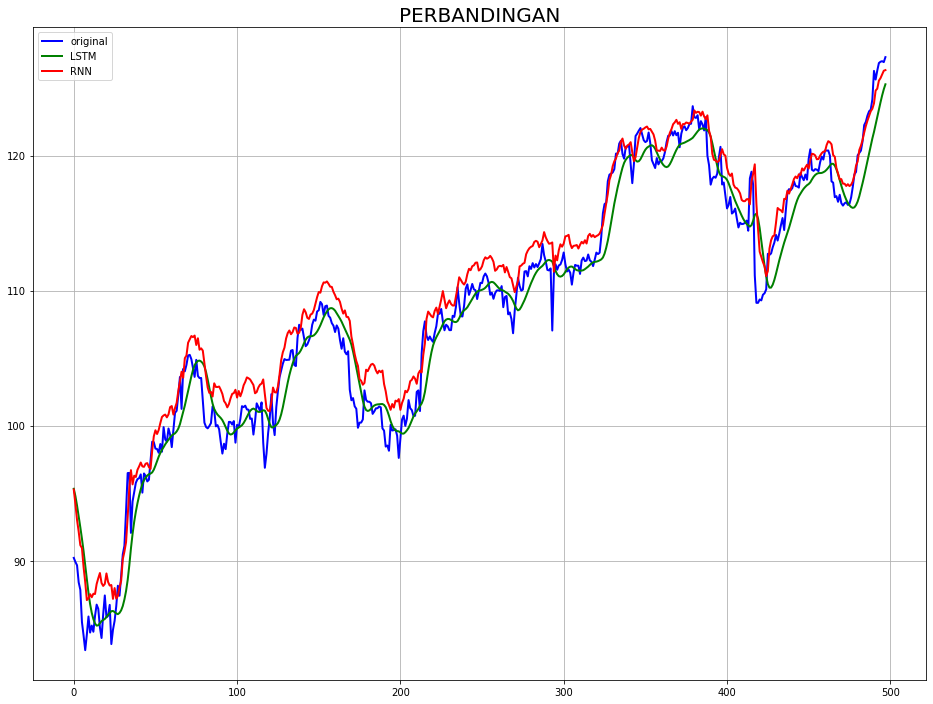

In [33]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()

Kesimpulan : Dari visualisasi hasil antara Original, LSTM dan RNN menampilkan grafik yang hampir sama semakin tinngi prediksi maka akan semakin naik pula grafiknya